# analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [2]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
#data.head(2)

In [3]:
#basic descriptive statistics
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
data.skew(numeric_only=True)

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

 >The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.
 From the graphs, we can see that **radius_mean**, **perimeter_mean**, **area_mean**, **concavity_mean** and **concave_points_mean** are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

In [5]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212



* Malignant = 1 (indicates prescence of cancer cells)
* Benign = 0 (indicates abscence)

##### **Observation**
> *357 observations indicating the absence of cancer cells and 212 show absence of cancer cell*

visualization is done 
* Histograms.
* Density Plots.
* Box and Whisker Plots.

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

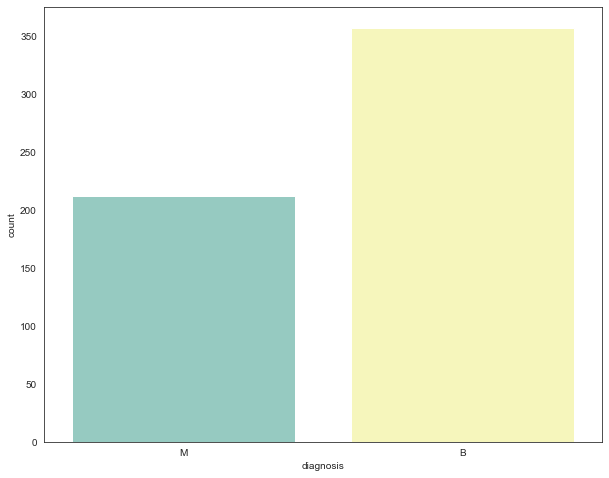

In [7]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(x = data['diagnosis'],label='Count',palette="Set3")

HISTOGRAM

In [8]:
#Break up columns into groups, according to their suffix designation 
#(_mean, _se,
# and __worst) to perform visualisation plots off. 
#Join the 'ID' and 'Diagnosis' back on
data_id_diag=data.loc[:,["id","diagnosis"]]
data_diag=data.loc[:,["diagnosis"]]

#For a merge + slice:
data_mean=data.iloc[:,1:11]
data_se=data.iloc[:,11:22]
data_worst=data.iloc[:,23:]

print(data_id_diag.columns)
#print(data_mean.columns)
#print(data_se.columns)
#print(data_worst.columns)



Index(['id', 'diagnosis'], dtype='object')


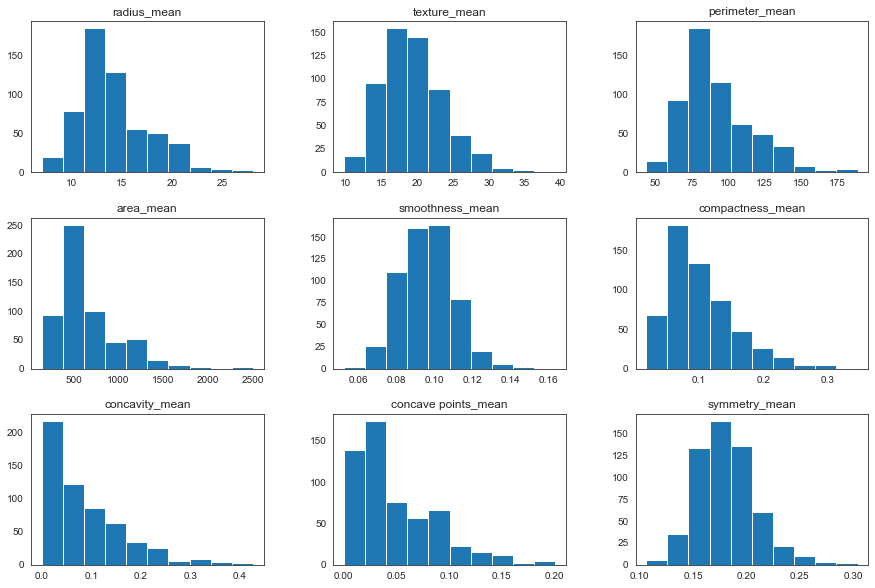

In [9]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

In [10]:
#Plot histograms of _se variables
#hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

In [11]:
#Plot histograms of _worst variables
#hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

### __Observation__ 

>We can see that perhaps the attributes  **concavity**,and **concavity_point ** may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.


data plots

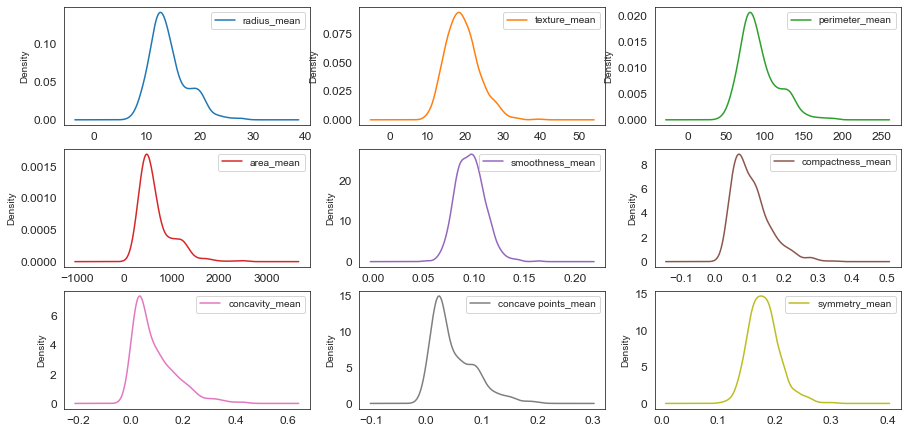

In [12]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))


In [13]:
#Density Plots
#plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
#                     sharey=False,fontsize=12, figsize=(15,10))


In [14]:
#Density Plots
#plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
#                     figsize=(15,10))


### Observation
>We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

In [15]:
# box and whisker plots
#plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

In [16]:
# box and whisker plots
#plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

In [17]:
# box and whisker plots
#plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

### Observation
>We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

 Multimodal Data Visualizations
* Scatter plots
* Correlation matrix

### Correlation matrix

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

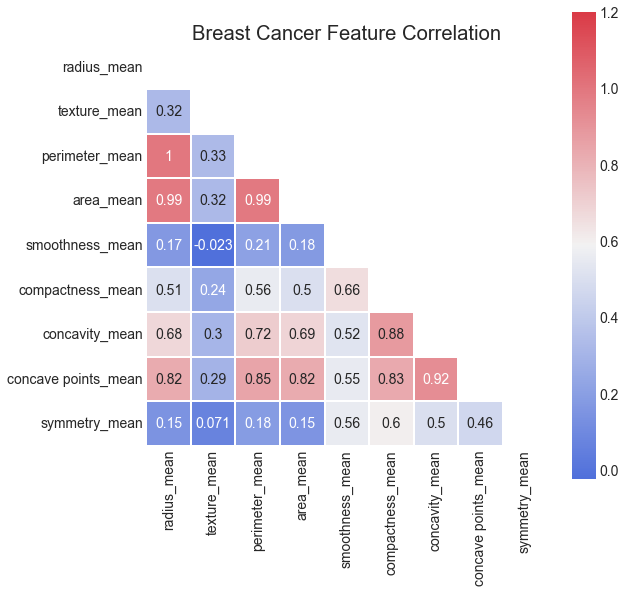

In [18]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

### Observation:
We can see strong positive relationship exists with mean values paramaters between 1-0.75;.
* The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;
* Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc
* Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.
    

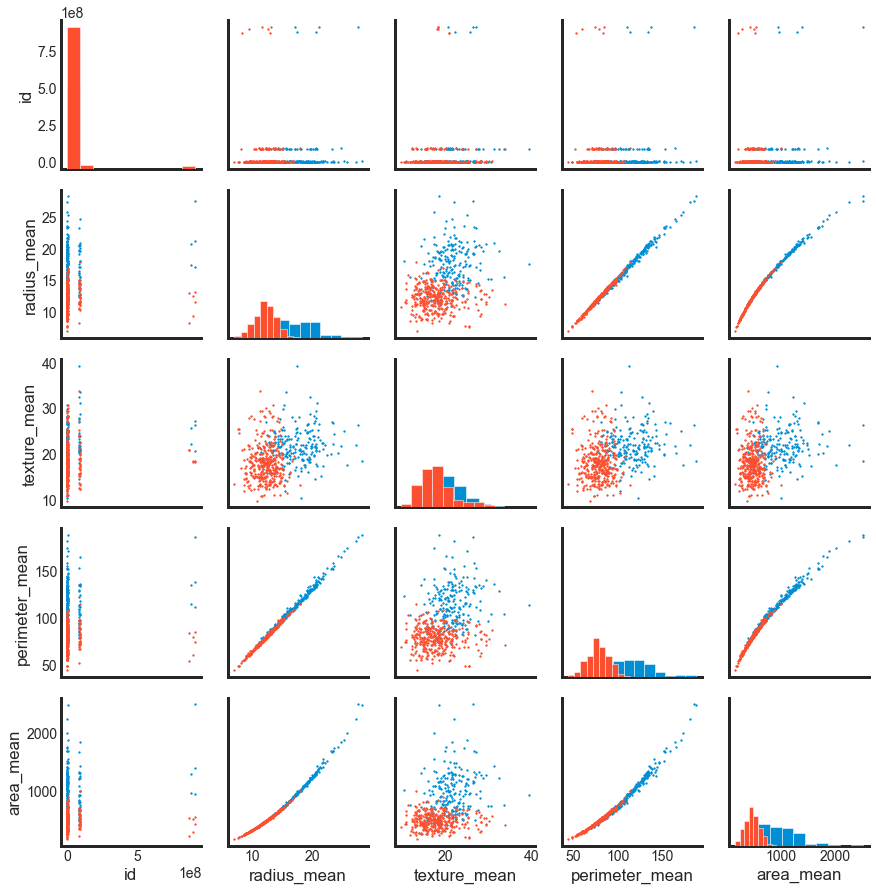

In [19]:

plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data/clean-data.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5],data.columns[6]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)